## Algorithmic trading framework master notebook

### First step create a duplicate of this master notebook and rename 

In [260]:
# Import required libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
import yfinance as yf
from finta import TA
import talib as ta
import quantstats as qs

### Add ticker below (search yahoo finance for correct symbol to use) [yfinance](https://finance.yahoo.com/lookup)

In [261]:
# Import data and display to check
df = yf.download(tickers="BTC-USD")
# df = yf.download(tickers="BTC-USD", start="2018-01-01", end="2020-02-21",)
# Review the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### Or add a csv file to the resource folder as alternative data source

In [262]:
# # Read the csv file located in the resources folder into a Pandas DataFrame
# # Set the Date column as the DateTimeIndex
# df = pd.read_csv(
#     Path("Resources/BTCUSDT_d.csv"),
#     index_col="date",
#     parse_dates=True, 
#     infer_datetime_format=True
# )

# # Review the DataFrame
# df.head()

### Data cleaning examples

In [229]:
# Check for nulls
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [230]:
# Drop columns if required (adjusted close NA for crypto)
df.drop(columns=["Adj Close", "Volume"])

,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109
2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875
2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2823 entries, 2014-09-17 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2823 non-null   float64
 1   High       2823 non-null   float64
 2   Low        2823 non-null   float64
 3   Close      2823 non-null   float64
 4   Adj Close  2823 non-null   float64
 5   Volume     2823 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 154.4 KB


In [232]:
# Convert to datetime index
df.index = pd.to_datetime(df.index)

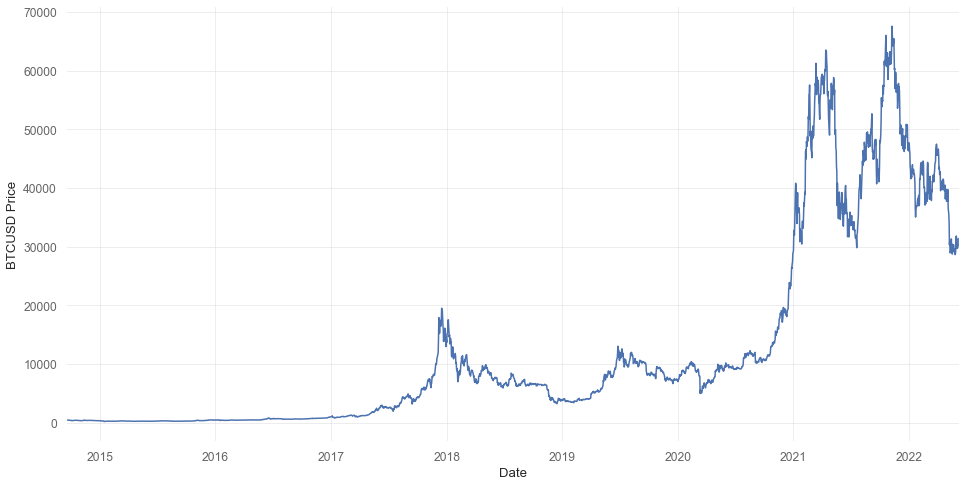

In [233]:
df.Close.plot(figsize=(16, 8))
plt.ylabel("BTCUSD Price")
plt.show()

### FinTa has over 80 technical indicators implemented in Pandas [FinTA](https://github.com/peerchemist/finta)

In [234]:
# Examples from repo
# Loading and preparing the data
# Load the .csv:

# ohlc = pd.read_csv("HistoricalQuotes.csv", index_col="Date", parse_dates=True)

# Now we need to make this ohlc comply to standards.

# Column names:

# ohlc.columns

# We need lowercase column names:

# ohlc.columns = ['close', 'volume', 'open', 'high', 'low']

# As you can see some of the values in the DataFrame have a "$" prefix. Let's see if we can remove that. You may notice that values have "$" prefix, we must remove that before continuing. This small function bellow will do that for us.
# def split(dollar: str) -> float:
# return float(dollar.split("$")[1])

# Now apply it to each column:

# ohlc["close"] = ohlc["close"].apply(split)

# ohlc["low"] = ohlc["low"].apply(split)

# ohlc["high"] = ohlc["high"].apply(split)

# ohlc["open"] = ohlc["open"].apply(split)

# TA
# Jump right into it to see how easy it is.

# TA.RSI(ohlc).tail(10)

# Date
# 2014-12-26    55.099394
# 2014-12-24    43.666451
# 2014-12-23    50.085415
# 2014-12-22    50.594291
# 2014-12-19    38.730709
# 2014-12-18    35.584319
# 2014-12-17    38.632773
# 2014-12-16    32.701255
# 2014-12-15    55.449033
# 2014-12-12    57.338081
# Name: RSI, dtype: float64
# Those are daily candles with standard RSI-14. How about weekly candles and EMA-5?

# Resample the ohlc:

# from finta.utils import resample_calendar

# finta.utils has a nice utility: "resample_calendar" which will make nice weekly candles in a jiffy.

# weekly_ohlc = resample_calendar(ohlc, "7d")

# TA.EMA(weekly_ohlc, 5).tail(10)

# 2019-10-04    1756.299843
# 2019-10-11    1766.693228
# 2019-10-18    1771.388819
# 2019-10-25    1773.145879
# 2019-11-01    1778.163920
# 2019-11-08    1770.309280
# 2019-11-15    1758.442853
# 2019-11-22    1778.465235
# 2019-11-29    1765.803490
# 2019-12-06    1760.108994
# Freq: W-FRI, Name: 5 period EMA, dtype: float64
# That's it, you now know the basics of finta.

### Generate a trading signal

In [235]:
# Filter the date index and close columns
signals_df = df.loc[:,["Close"]]

# Set the short window and long window
short_window = 5
long_window = 21

# Generate the short and long moving averages (5 and 21 days, respectively)
signals_df['SMA5'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA21'] = signals_df['Close'].rolling(window=long_window).mean()
signals_df['Signal'] = 0.0

# Generate the trading signal 0 or 1,
# where 1 is when the SMA5 is greater than than the SMA21
# where 0 is when the SMA5 is less than the SMA21
signals_df['Signal'][short_window:] = np.where(
    signals_df['SMA5'][short_window:] > signals_df['SMA21'][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df['Entry/Exit'] = signals_df['Signal'].diff()

# Review the DataFrame
signals_df.tail(30)

,Close,SMA5,SMA21,Signal,Entry/Exit
Date,,,,,
2022-05-11,28936.355469,31963.486719,37143.803199,0.0,0.0
2022-05-12,29047.751953,30672.646484,36597.155041,0.0,0.0
2022-05-13,29283.103516,29717.414062,36099.192336,0.0,0.0
2022-05-14,30101.265625,29678.276562,35652.265439,0.0,0.0
2022-05-15,31305.113281,29734.717969,35263.494978,0.0,0.0
2022-05-16,29862.917969,29920.030469,34758.952567,0.0,0.0
2022-05-17,30425.857422,30195.651562,34392.685733,0.0,0.0
2022-05-18,28720.271484,30083.085156,33891.692894,0.0,0.0
2022-05-19,30314.333984,30125.698828,33441.240792,0.0,0.0


### Plot entry and exit points of strategy and check for logical errors

In [236]:
# Visualize the entry positions relative to close price
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=100,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

# Visualize the exit positions relative to close price
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=100,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

# Visualize the close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize the moving averages
moving_avgs = signals_df[['SMA5', 'SMA21']].hvplot(
    line_color=['lightblue', 'pink'],
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay the plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(
    title="BTC Moving Average Trading Algorithm"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### Backtest the strategy

In [237]:
# Set the initial capital
initial_capital = float(100000)

In [238]:
# Set the share(position) size (use negative numer if a short strategy)
share_size = 1

In [239]:
# Take a 500 share position where the dual moving average crossover is 1 (SMA5 is greater than SMA21)
# Otherwise 'Position' will be zero
signals_df["Position"] = share_size * signals_df["Signal"]
signals_df

,Close,SMA5,SMA21,Signal,Entry/Exit,Position
Date,,,,,,
2014-09-17,457.334015,NaN,NaN,0.0,NaN,0.0
2014-09-18,424.440002,NaN,NaN,0.0,0.0,0.0
2014-09-19,394.795990,NaN,NaN,0.0,0.0,0.0
2014-09-20,408.903992,NaN,NaN,0.0,0.0,0.0
2014-09-21,398.821014,416.859003,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0


In [240]:
# Find the points in time where a 500 share position is bought or sold
signals_df["Entry/Exit Position"] = signals_df["Position"].diff()
signals_df

,Close,SMA5,SMA21,Signal,Entry/Exit,Position,Entry/Exit Position
Date,,,,,,,
2014-09-17,457.334015,NaN,NaN,0.0,NaN,0.0,NaN
2014-09-18,424.440002,NaN,NaN,0.0,0.0,0.0,0.0
2014-09-19,394.795990,NaN,NaN,0.0,0.0,0.0,0.0
2014-09-20,408.903992,NaN,NaN,0.0,0.0,0.0,0.0
2014-09-21,398.821014,416.859003,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0,0.0
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0,0.0
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0,0.0


In [241]:
# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df["Portfolio Holdings"] = (
    signals_df["Close"] * signals_df["Entry/Exit Position"].cumsum()
)
signals_df

,Close,SMA5,SMA21,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,0.0,NaN,0.0,NaN,NaN
2014-09-18,424.440002,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
2014-09-19,394.795990,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
2014-09-20,408.903992,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
2014-09-21,398.821014,416.859003,NaN,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0,0.0,29906.662109
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0,0.0,31370.671875
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0,0.0,31155.478516


In [242]:
# Subtract the initial capital by the portfolio holdings to get the amount of available cash in the portfolio
signals_df["Portfolio Cash"] = (
    initial_capital - (signals_df["Close"] * signals_df["Entry/Exit Position"]).cumsum()
)
signals_df

,Close,SMA5,SMA21,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash
Date,,,,,,,,,
2014-09-17,457.334015,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2014-09-18,424.440002,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000
2014-09-19,394.795990,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000
2014-09-20,408.903992,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000
2014-09-21,398.821014,416.859003,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000
...,...,...,...,...,...,...,...,...,...
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0,0.0,29906.662109,103422.112167
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0,0.0,31370.671875,103422.112167
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0,0.0,31155.478516,103422.112167


In [243]:
# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df["Portfolio Total"] = (
    signals_df["Portfolio Cash"] + signals_df["Portfolio Holdings"]
)
signals_df

,Close,SMA5,SMA21,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
Date,,,,,,,,,,
2014-09-17,457.334015,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2014-09-18,424.440002,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000
2014-09-19,394.795990,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000
2014-09-20,408.903992,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000
2014-09-21,398.821014,416.859003,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000
...,...,...,...,...,...,...,...,...,...,...
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0,0.0,29906.662109,103422.112167,133328.774277
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0,0.0,31370.671875,103422.112167,134792.784042
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0,0.0,31155.478516,103422.112167,134577.590683


In [244]:
# Calculate the portfolio daily returns
signals_df["Portfolio Daily Returns"] = signals_df["Portfolio Total"].pct_change()
signals_df

,Close,SMA5,SMA21,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
Date,,,,,,,,,,,
2014-09-17,457.334015,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,NaN
2014-09-19,394.795990,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000
2014-09-20,408.903992,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000
2014-09-21,398.821014,416.859003,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0,0.0,29906.662109,103422.112167,133328.774277,0.000553
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0,0.0,31370.671875,103422.112167,134792.784042,0.010980
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0,0.0,31155.478516,103422.112167,134577.590683,-0.001596


In [245]:
# Calculate the cumulative returns
signals_df["Portfolio Cumulative Returns"] = (
    1 + signals_df["Portfolio Daily Returns"]
).cumprod() - 1

In [246]:
# Print the DataFrame
signals_df.tail()

,Close,SMA5,SMA21,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,
2022-06-05,29906.662109,29942.107031,29808.658110,1.0,0.0,1.0,0.0,29906.662109,103422.112167,133328.774277,0.000553,0.333288
2022-06-06,31370.671875,30256.425391,29880.455915,1.0,0.0,1.0,0.0,31370.671875,103422.112167,134792.784042,0.010980,0.347928
2022-06-07,31155.478516,30394.023438,29915.199777,1.0,0.0,1.0,0.0,31155.478516,103422.112167,134577.590683,-0.001596,0.345776
2022-06-08,30214.355469,30496.016406,29986.346633,1.0,0.0,1.0,0.0,30214.355469,103422.112167,133636.467636,-0.006993,0.336365
2022-06-09,30194.072266,30568.248047,29980.619885,1.0,0.0,1.0,0.0,30194.072266,103422.112167,133616.184433,-0.000152,0.336162


### Plot entry/exit points of backtest results

In [247]:
# Visualize exit positions relative to total portfolio value
entry = signals_df[signals_df["Entry/Exit"] == 1.0]["Portfolio Total"].hvplot.scatter(
    color='green',
    marker='^',
    size=100,
    legend=False, 
    ylabel="Total Portfolio Value", 
    width=1000, 
    height=400
)

# Visualize entry positions relative to total portfolio value
exit = signals_df[signals_df["Entry/Exit"] == -1.0]["Portfolio Total"].hvplot.scatter(
    color='red',
    marker='v',
    size=100,
    legend=False, 
    ylabel="Total Portfolio Value", 
    width=1000, 
    height=400
)

# Visualize the total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="BTC-USD - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

---

### Setup the portfolio-level risk/reward evaluation metrics
### Initialise a portfolio evaluation DataFrame with an index set to `['Annualized Return', 'Cumulative Returns', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio']` and the columns set to `['Backtest']`.

In [248]:
# Create the list of the metric names
metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


Calculate and assign the following portfolio evaluation metrics to the portfolio evaluation DataFrame:

* Annualized return

* Cumulative returns

* Annual volatility

* Sharpe ratio

* Sortino ratio


In [249]:
# Calculate the Annualized return metric
portfolio_evaluation_df.loc['Annualized Return'] = (
    signals_df['Portfolio Daily Returns'].mean() * 252
)

In [250]:
# Calculate the Cumulative returns metric
portfolio_evaluation_df.loc['Cumulative Returns'] = signals_df['Portfolio Cumulative Returns'][-1]

In [251]:
# Calculate the Annual volatility metric
portfolio_evaluation_df.loc['Annual Volatility'] = (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

In [252]:
# Calculate the Sharpe ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    signals_df['Portfolio Daily Returns'].mean() * 252) / (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

In [253]:
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = signals_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio


In [256]:
# Review the portfolio evaluation DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,0.028195
Cumulative Returns,0.336162
Annual Volatility,0.067891
Sharpe Ratio,0.415292
Sortino Ratio,0.60021


### Initialise a trade-level risk/reward evaluation metrics
### With the columns set to `['Stock', 'Entry Date', 'Exit Date', 'Shares', 'Entry Share Price', 'Exit Share Price', 'Entry Portfolio Holding', 'Exit Portfolio Holding', 'Profit/Loss']`.

In [257]:
# Initialize the trade evaluation DataFrame
trade_evaluation_df = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)


### Create a `for` loop to iterate through the backtested signals DataFrame, pulling the relevant entry and exit data values to calculate the per-trade profit/loss values and appending each record to the trade evaluation DataFrame.

In [258]:
# Initialize the iterative variables
entry_date = ""
exit_date = ""
entry_portfolio_holding = 0.0
exit_portfolio_holding = 0.0
share_size = 0
entry_share_price = 0.0
exit_share_price = 0.0

# Loop through the signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Entry/Exit Position']
        entry_share_price = row['Close']

    elif row['Entry/Exit'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df = trade_evaluation_df.append(
            {
                'Stock': 'BTC-USD',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Review the DataFrame
trade_evaluation_df

,Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss
0,BTC-USD,2014-10-14,2014-10-25,1.0,400.869995,347.270996,400.869995,347.270996,53.598999
1,BTC-USD,2014-11-10,2014-11-22,1.0,366.924011,352.920013,366.924011,352.920013,14.003998
2,BTC-USD,2014-12-03,2014-12-09,1.0,375.010010,352.218994,375.010010,352.218994,22.791016
3,BTC-USD,2015-01-26,2015-02-01,1.0,273.472992,226.972000,273.472992,226.972000,46.500992
4,BTC-USD,2015-02-02,2015-02-04,1.0,238.229004,226.852997,238.229004,226.852997,11.376007
...,...,...,...,...,...,...,...,...,...
66,BTC-USD,2021-10-03,2021-11-17,1.0,48199.953125,60368.011719,48199.953125,60368.011719,-12168.058594
67,BTC-USD,2021-12-24,2021-12-31,1.0,50822.195312,46306.445312,50822.195312,46306.445312,4515.750000
68,BTC-USD,2022-02-05,2022-02-20,1.0,41441.164062,38431.378906,41441.164062,38431.378906,3009.785156
69,BTC-USD,2022-03-02,2022-03-07,1.0,43924.117188,38062.039062,43924.117188,38062.039062,5862.078125


---